<a href="https://colab.research.google.com/github/Jxelr/RNA/blob/main/Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from tensorflow import keras
from keras import utils
import os
import matplotlib.pyplot as plt



In [5]:
"""Descarga y descomprime los datos"""
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-10-27 06:29:01--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.84.134, 52.217.71.198, 52.217.99.30, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.84.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip.3’

jena_climate_2009_2 100%[===================>]  12.94M  18.8MB/s    in 0.7s    

2023-10-27 06:29:02 (18.8 MB/s) - ‘jena_climate_2009_2016.csv.zip.3’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
replace jena_climate_2009_2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
"""Imprimimos los encabezados y separamos los datos del encabezado"""

fname = os.path.join("jena_climate_2009_2016.csv")
with open(fname) as f:
   data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [7]:
"""Separamos Datos"""
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(",")[1:]]
  temperature[i] = values[1]
  raw_data[i, :] = values[:]

In [9]:
"""Definimos la longitud de las secuencias"""
sequence_length = 120

"""Definimos los porcentajes para entrenamiento, validación y prueba"""
train_split=0.5
val_split=0.25
test_split=0.25

In [8]:
"""Calcula los tamaños de los conjuntos"""
num_samples = len(temperature) - sequence_length + 1
num_train_samples = int(train_split * num_samples)
num_val_samples = int(val_split * num_samples)
num_test_samples = num_samples - num_train_samples - num_val_samples

In [13]:
"""calculamos los valores de star_index y end_index para los conjuntos"""
start_index = 0
end_index = len(temperature) - 1

train_end_index = start_index + num_train_samples
train_end_index = min(train_end_index, end_index)

val_end_index = train_end_index + num_val_samples
val_end_index=min(val_end_index, end_index)

In [14]:
"""Generamos los conjuntos de datos de secuencias usando timeseries_dataset_from_array"""
sampling_rate = 1
batch_size = 20

In [18]:
"""Dividimos los datos en conjuntos de entrenamiento, validación y prueba"""
train_dataset = keras.utils.timeseries_dataset_from_array(
    data=temperature,
    targets=temperature,
    sequence_length=sequence_length,
    batch_size=batch_size,
    start_index=start_index,
    end_index=train_end_index,
    shuffle=True
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    data=temperature,
    targets=temperature,
    sequence_length=sequence_length,
    batch_size=batch_size,
    start_index=train_end_index,
    end_index=val_end_index,
    shuffle=False
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    data=temperature,
    targets=temperature,
    sequence_length=sequence_length,
    batch_size=batch_size,
    start_index=val_end_index,
    end_index=end_index,
    shuffle=False
)


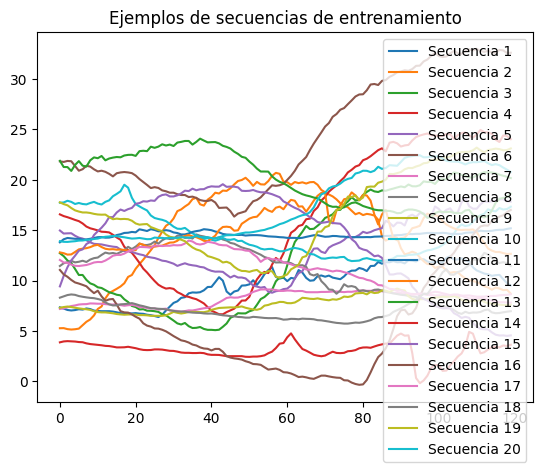

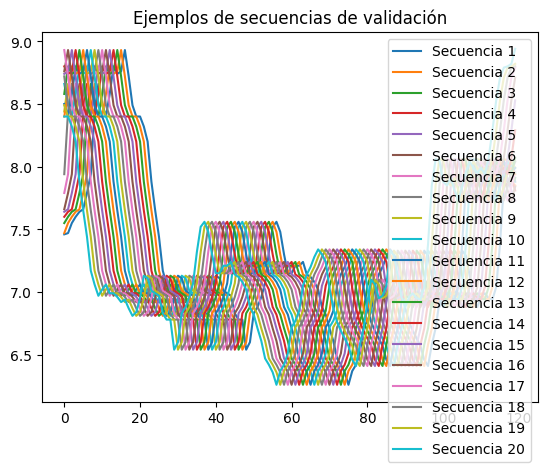

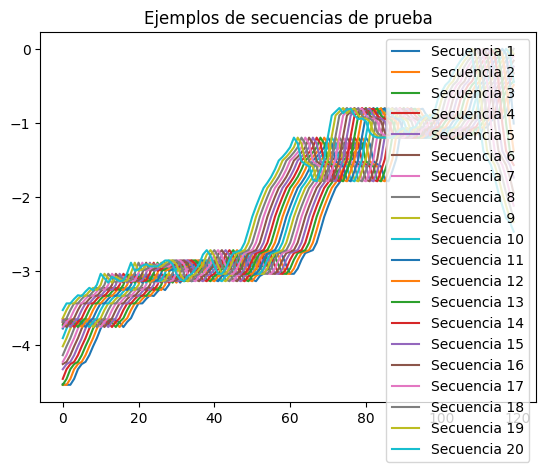

In [20]:
# Itera a través del conjunto de entrenamiento y muestra algunas secuencias
for batch in train_dataset:
    sequences, targets = batch
    # El número de secuencias en cada lote es igual al tamaño de lote (batch_size)
    for i in range(batch_size):
        plt.plot(sequences[i], label=f'Secuencia {i+1}')
    plt.title('Ejemplos de secuencias de entrenamiento')
    plt.legend()
    plt.show()
    break  # Para mostrar solo el primer lote


# Itera a través del conjunto de validación y muestra algunas secuencias
for batch in val_dataset:
    sequences, targets = batch
    # El número de secuencias en cada lote es igual al tamaño de lote (batch_size)
    for i in range(batch_size):
        plt.plot(sequences[i], label=f'Secuencia {i+1}')
    plt.title('Ejemplos de secuencias de validación')
    plt.legend()
    plt.show()
    break  # Para mostrar solo el primer lote


# Itera a través del conjunto de prueba y muestra algunas secuencias
for batch in test_dataset:
    sequences, targets = batch
    # El número de secuencias en cada lote es igual al tamaño de lote (batch_size)
    for i in range(batch_size):
        plt.plot(sequences[i], label=f'Secuencia {i+1}')
    plt.title('Ejemplos de secuencias de prueba')
    plt.legend()
    plt.show()
    break  # Para mostrar solo el primer lote